<a href="https://colab.research.google.com/github/meena25091992/Yes_Bank_Stock_Closing_Price_Prediction/blob/main/Group_Notebook_Stock_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:-

>Yes Bank is a well-known bank in the Indian financial domain. Since 2018,it has been in the news because of the fraud case involving Rana Kapoor.Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. 



# Business Goal:-

> The main objective is to predict the stock's closing price of the month.To determine the YES bank's stock’s future value on the national stock exchange. The advantage of a successful prediction of a stock's future price could results insignificant profit. The efficient-market hypothesis recommends that stock costs mirror all right now accessible data and any value changes that are not founded on recently uncovered data subsequently are an unpredictable.We have to build model which help us to predict the future stock prices.




In [419]:
# Importing the libraries

import numpy as np                #  Import numpy for mathematical calculation
import pandas as pd               #  Import pandas for data wrangling
import matplotlib.pyplot as plt   #  Import matplotlib and seaborn for Data Visualization
import seaborn as sns
from datetime import datetime     # Import datetime to convert date column into proper format

# This method is used to split the dataset into training and test set while buliding the model
from sklearn.model_selection import train_test_split

# Import different models for prediction
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet 

# import matrix module to evaluate the performance of the model
from sklearn.metrics import *
import pandas.util.testing as tm

# import variance_inflation_factor method to reduce multicollinearity in independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [326]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [327]:
# Importing Dataset and read files

file_path = '/content/drive/MyDrive/Meenakshi_Supervised_ML_Capestone_Project/data_YesBank_StockPrices.csv'
yes_bank_df = pd.read_csv(file_path)

yes_bank_df.shape # fetching number of rows and columns from dataframe

(185, 5)

In [328]:
# fetching first five rows from dataset using head() function

yes_bank_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [329]:
# fetch basic information about the features in our dataframe

yes_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [330]:
# creating a copy of dataframe so that our original dataset not reflect 

stock_price_df = yes_bank_df.copy()


# Checking for NULL and Duplicate values

In [331]:
# check if there is any null value or not

stock_price_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

* There is no NULL value in the dataset

In [332]:
# check for any duplicate row or not
len(stock_price_df[stock_price_df.duplicated()])

0

* There is no DUPLICATE value in the dataset

# Dataset Description
  We have a dataset of YES BANK which contain monthly stock prices of bank since its opening.It contain multiple features like:-


*   **Date :-** Date denotes the date of investment(date contains month and year for a particular price) (Object)
* **Open :-** means the price at which a stock started trading   (Numerical).
*  **High :-**The high is the highest price at which a stock traded during a period (Numerical).
*  **Low :-**The low is the minimum price at which a stock traded during a period (Numerical).
*  **Close :-** The closing price refers to a stock's trading price closed at the end of a trading day (Numerical).It's a depenedent variable which we need to predict from our respetive ML models.The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.



  

In [333]:
""" The describe() function computes a summary of statistics pertaining to the DataFrame columns.
    This function gives the mean, std and IQR values. And, function excludes the character columns 
    and given summary about numeric columns.
"""
stock_price_df.describe(include='all') 

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [334]:
# check the format of "Date" column

stock_price_df['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

*  
From the above output,We have seen that the format of Date is **"MMMM-YY"** .So we need to convert in proper date format **"YYYY-MM-DD"**.Also,convert **year** into numeric format .




In [335]:
# Converting 'Date' into datetime - 'YYYY-MM-DD' format
# Using Pandas to_datetime() method helps to convert string Date time into Python Date time object
# Apply lambda function to convert  all values of date column to proper format 

stock_price_df['Date'] = pd.to_datetime(stock_price_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))
stock_price_df['Date'] 

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]



*   But the problem is that our ML model like Linear Regression doesn't work on "Date" data.So we need to convert it into numerical column.But, numerical date have no use in our respetive dataframe to predict the goal .So,make the "Date" column as dataframe index .



In [336]:
# Make "Date" column as index of the dataframe

stock_price_df.set_index('Date', inplace=True)

In [337]:
# check the changes 

stock_price_df.tail()

,Open,High,Low,Close
Date,,,,
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15
2020-10-01,13.30,14.01,12.11,12.42
2020-11-01,12.41,14.90,12.21,14.67


In [338]:
# Now only 4 columns are left in the respective dataframe

stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 7.2 KB


* There are only 4 columns left in the dataset.

# Exploratory Data Analysis

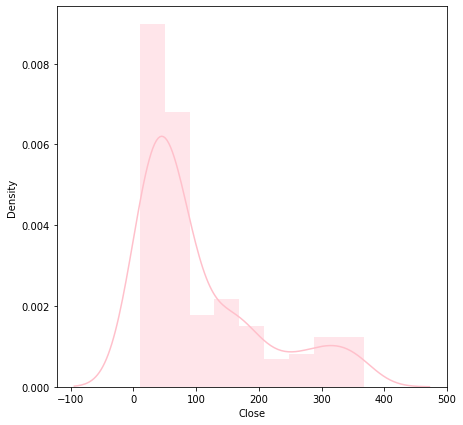

In [421]:
#  Plot the histogram to see Dependent variable 'Close' distribution whcih we need to predict later 

plt.figure(figsize=(7,7))
sns.distplot(stock_price_df['Close'],color="pink")

*  The above distibution is not a **Normal Distribution**.It's a **Positively Skewed Distribution** .So,We need to convert it into Normal Distribution using **Log Tranformation**.




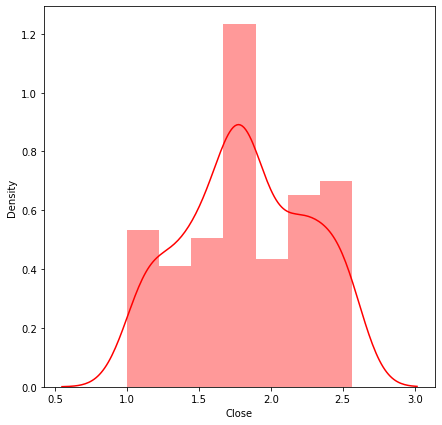

In [340]:
# Dependent variable 'Close' price of a stock

plt.figure(figsize=(7,7))
sns.distplot(np.log10(stock_price_df['Close']),color="r")

* It is not a perfect Normal Distribution Graph but it looks like    Normal Distribution Graph.

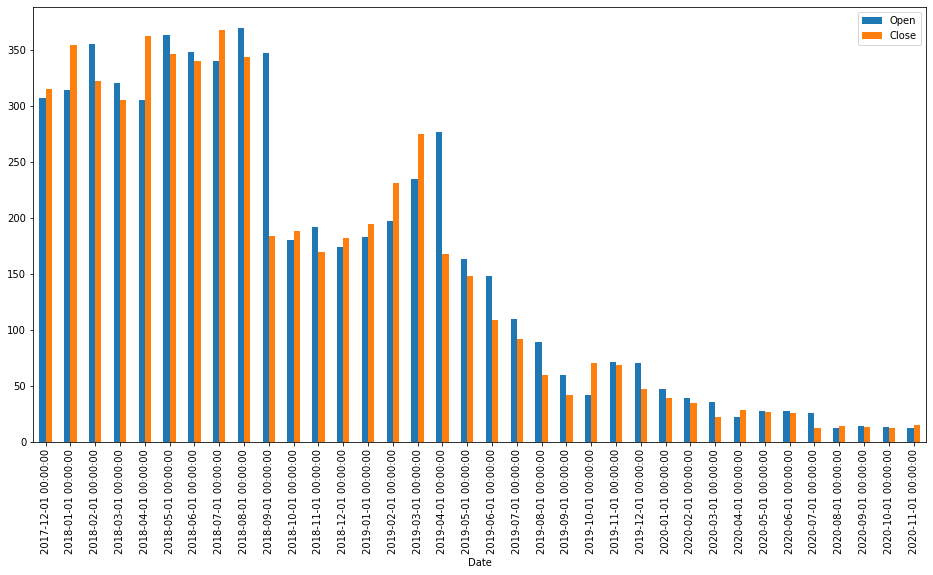

In [341]:
#Plot Open vs Close price using bar graph

stock_price_df[['Open','Close']].tail(36).plot(kind='bar',figsize=(16,8)) # show only last three year record
plt.show()

# Numerical Features

In [342]:
# Check the numerical columns in dataset

numeric_features = stock_price_df.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

*   All the columns are numerical in the dataset.



# Checking the Distribution and Outliers

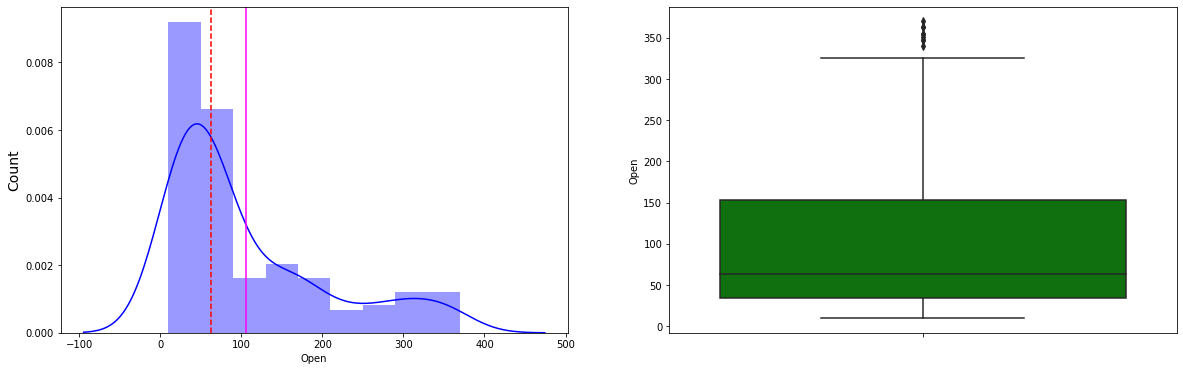

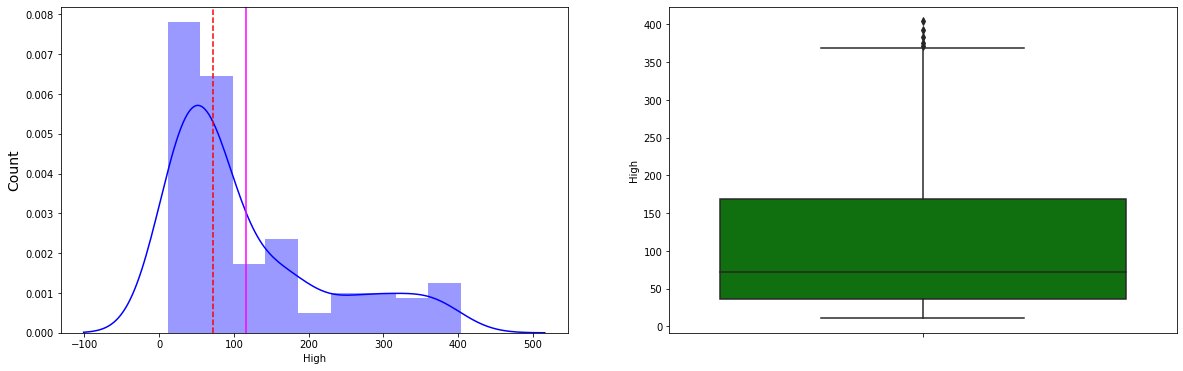

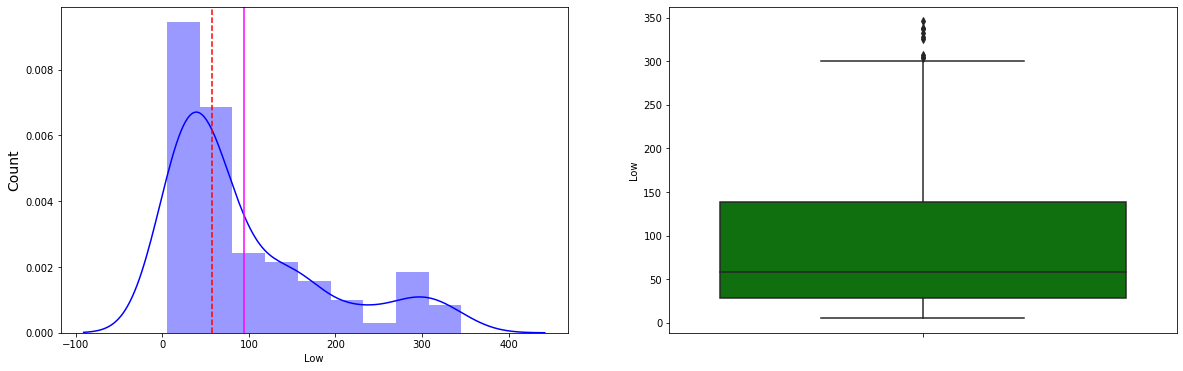

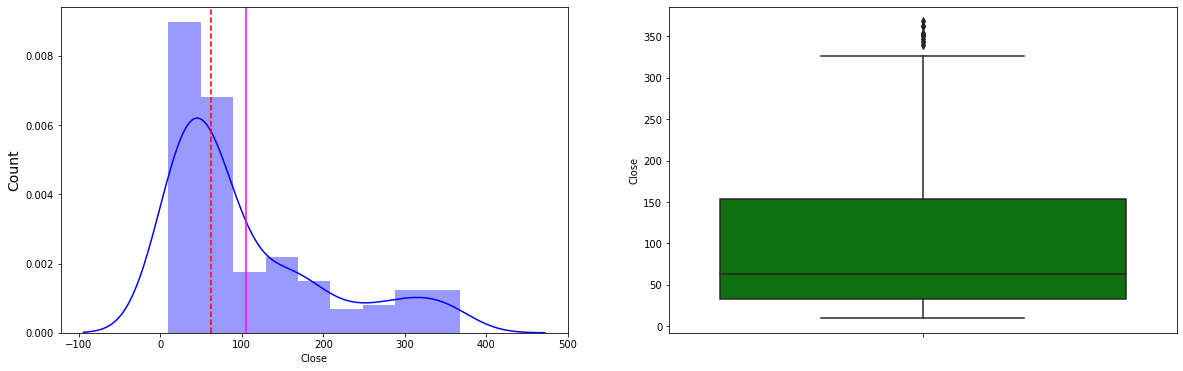

In [343]:
# plot a bar plot for each numerical feature and see the ditriution is normal or not

for col in numeric_features:
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(stock_price_df[col], color="blue")

# The Axes. axvline() function in axes module of matplotlib library is used to add a vertical line across the axis.
# It will show where the "mean" and "median" lie for each plot  

    plt.ylabel("Count", size=14)
    plt.axvline(stock_price_df[col].mean(),color='magenta',linewidth=1.5)
    plt.axvline(stock_price_df[col].median(),color='red',linestyle="dashed",linewidth=1.5)

# create boxplot to see if there is any outliers in any column or not
# use subplot() function of matplotlib to create boxplot in this figure itself
# box plot is used to check outliers are present in respective features or not

    plt.subplot(1, 2, 2)
    sns.boxplot(y=stock_price_df[col], color="green")
 
plt.show()

* The above graph shows that they are not a normal distribution curve.
* The mean and median should be equal for perfect normal distribution curve.But, mean is not equal to median as there is not a perfect normal distribution curve.
* We need to convert all the features to normal distribution using log tranformation.
* Outliers are present in each column.By, converting our features to normal distribution using log tranform .We can remove ouliers from the dataset.



# Log tranformation to convert features to Normal Distribution

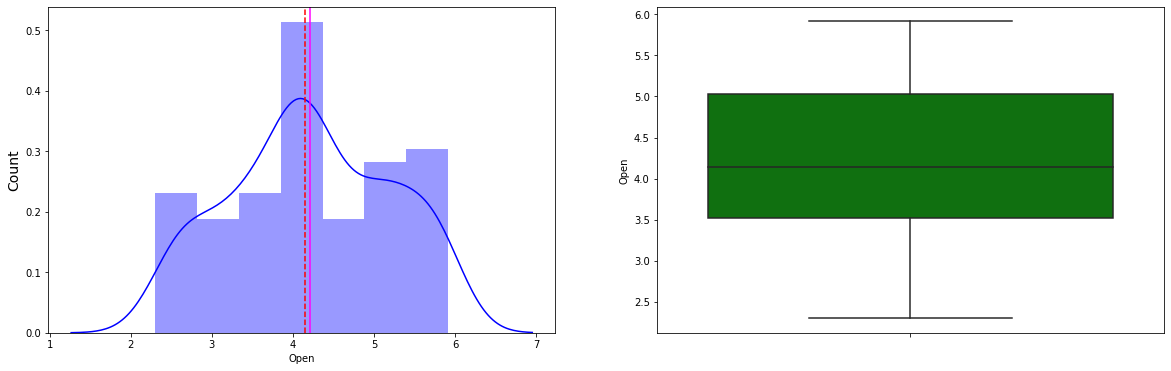

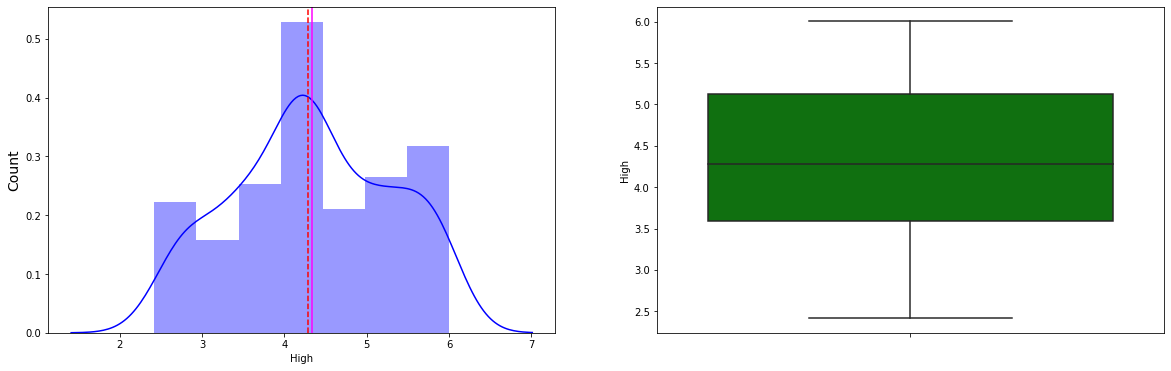

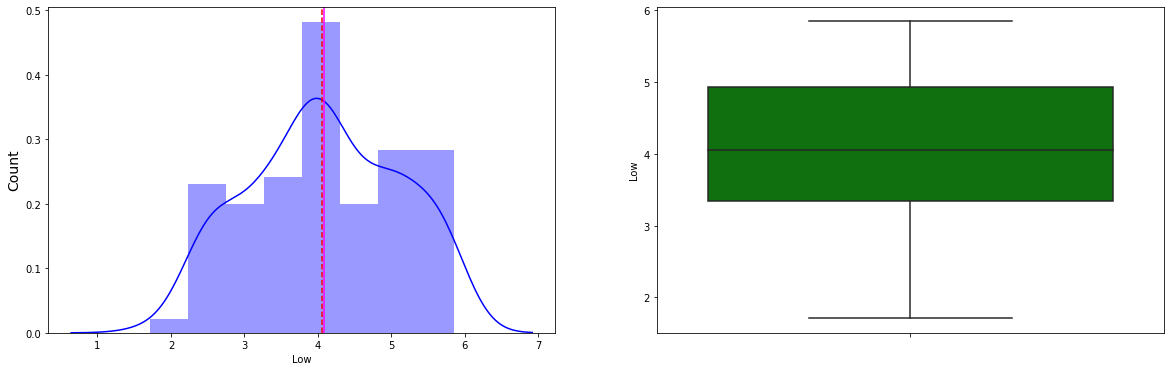

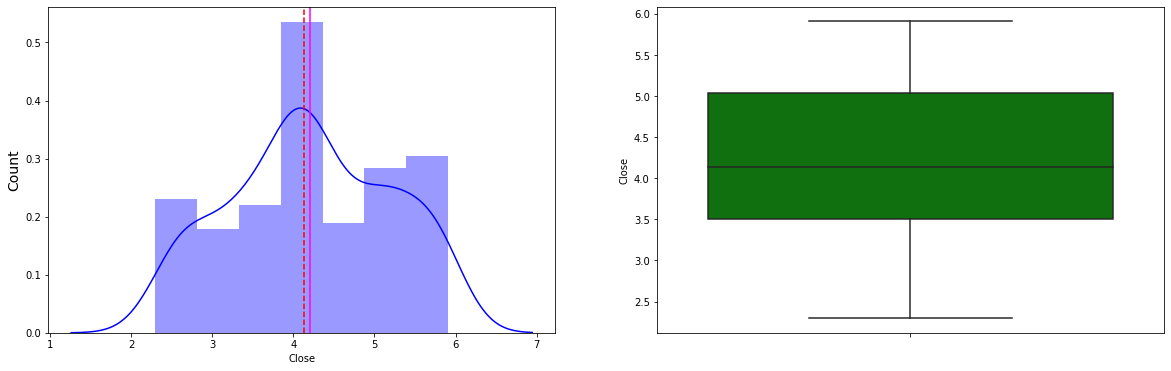

In [344]:
# log tranformation to convert a column to normal distribution

for col in numeric_features:
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)

# np.log() is a method in numpy library to convert our dataset values into log transformation to get a normal distribution curve

    feature_to_log = np.log(stock_price_df[col])  # assign log tranformation value into a variable 
    sns.distplot(feature_to_log, color="blue")

# The Axes. axvline() function in axes module of matplotlib library is used to add a vertical line across the axis.
# It will show where the "mean" and "median" lie for each plot  

    plt.ylabel("Count", size=14)
    plt.axvline(feature_to_log.mean(),color='magenta',linewidth=1.5)
    plt.axvline(feature_to_log.median(),color='red',linestyle="dashed",linewidth=1.5)

# create boxplot to see if there is any outliers in any column or not
# use subplot() function of matplotlib to create boxplot in this figure itself

    plt.subplot(1, 2, 2)
    sns.boxplot(y=feature_to_log, color="green")
 
plt.show()

* From the above graph, We see that now our graph is nearly close to normal distribution.
* Mean is nearly equal to median.
* From the box plot, We see that outliers are removed by log transformation.


* From the above boxplot we can see that after applying np.log10() method with independent features "Open" , "High" , "Low" we get a normal distribution curve which helps to remove the outliers from the column "Open" , "High" , "Low".
* From the boxplot, We can also find the **quartile (q1 , q2 , q3)**
* We got the approximate result:-

   * **For Feature "Open" :-**
   
    * **Lower Quartile (Q1) :- 3.6**
    
    * **Median (Q2) :- 4.3**

    * **Upper Quartile (Q3) :- 5.0**

  * **For Feature "High" :-**
   
    * **Lower Quartile (Q1) :- 3.6**
    
    * **Median (Q2) :- 4.4**

    * **Upper Quartile (Q3) :- 5.1**
  
  * **For Feature "Low" :-**
    * **Lower Quartile (Q1) :- 3.3**
    
    * **Median (Q2) :- 4.1**

    * **Upper Quartile (Q3) :- 4.9**

# Check how the stock price vary after fraud case 2018

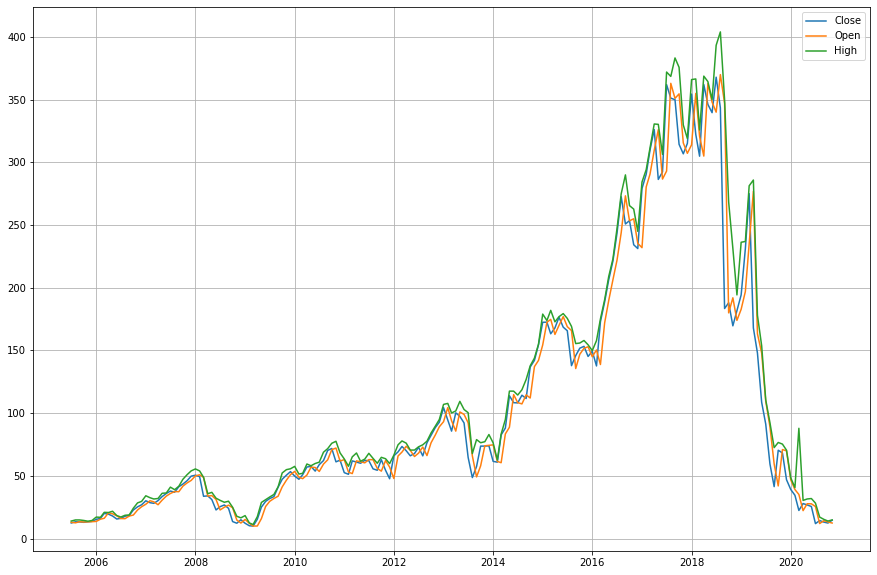

In [345]:
# Plot the Line for each numerical column and see how stock price is affected after fraud case 2018

plt.figure(figsize=(15,10))
plt.plot(stock_price_df['Close'])
plt.plot(stock_price_df['Open'])
plt.plot(stock_price_df['High'])
plt.legend(['Close','Open','High'])
plt.grid()

* From the above line plot ,We conclude that the stock price is keep on increasing till 2018.
* But after 2018 , the stock price is keep on decreasing due the fraud case involving Rana Kapoor.

# Creating dependent and independent varaiables


In [346]:
# Creating a dependent variable i.e 'Y'

dependent_variable = stock_price_df.iloc[:,-1]  # use iloc method of the dataframe to select only dependent variable i.e. last column


In [347]:
# Create a list of independent variables i.e x1,x2,x3,.....xn

independent_variables = stock_price_df.iloc[:,:-1] # use iloc method of the dataframe to select all independent variable i.e. except last column
independent_variables.head(5)

,Open,High,Low
Date,,,
2005-07-01,13.00,14.00,11.25
2005-08-01,12.58,14.88,12.55
2005-09-01,13.48,14.87,12.27
2005-10-01,13.20,14.47,12.40
2005-11-01,13.35,13.88,12.88


# Use Heat Map to show correlation between all variables

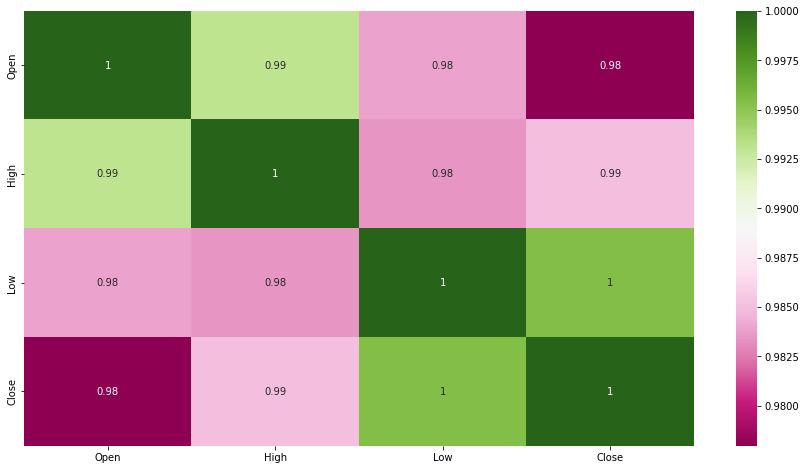

In [348]:
# Correlation between each and every column of the dataframe

plt.figure(figsize=(15,8))
correlation = stock_price_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='PiYG')

* The above heat map shows that all the features are highly correlated with each other.

# Plot the entire dataframe using PairGrid and checking the relation between variables

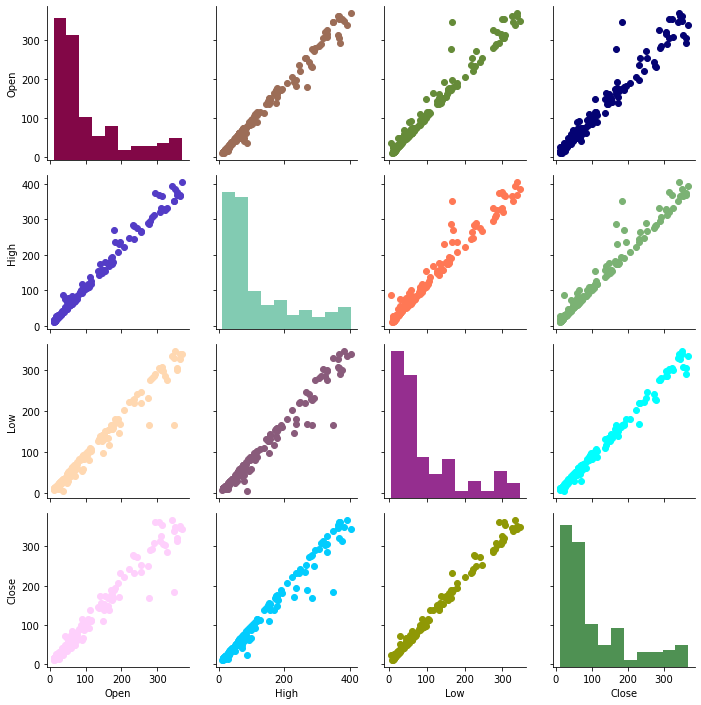

In [349]:
# It plot each and every column of our df with other column

colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue'])

def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)

g = sns.PairGrid(stock_price_df)
g.map_diag(my_hist)
g.map_offdiag(my_scatter)

* The above pair plot shows high correlation among variables.

# Checking correlation between dependent vs independent variable

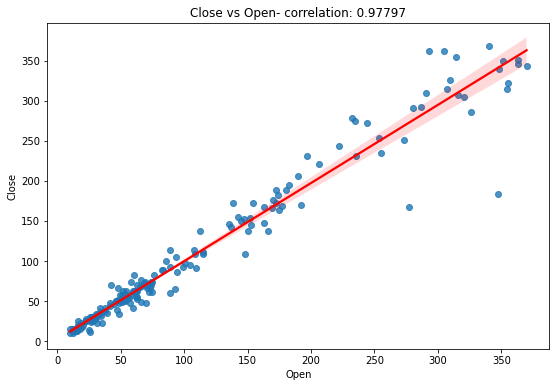

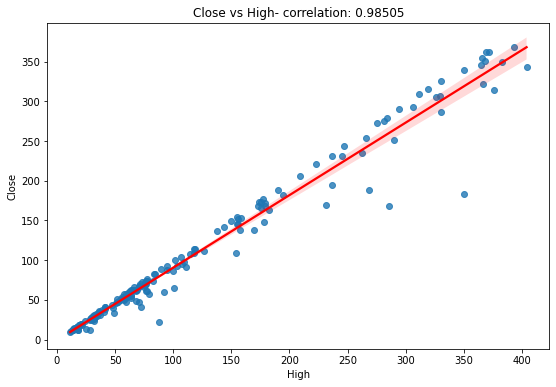

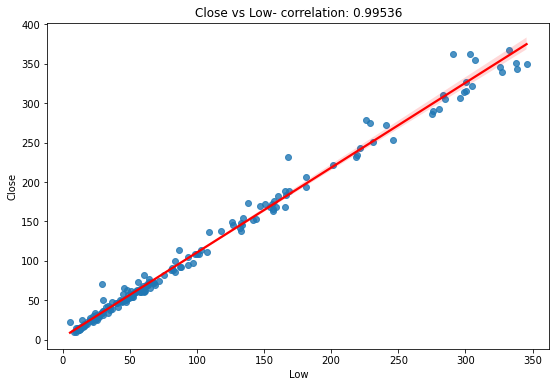

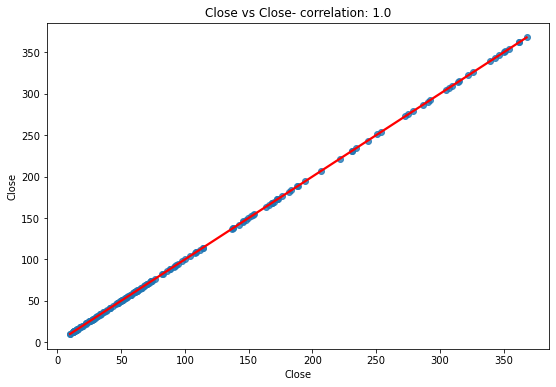

In [350]:
# find correlation betweeen different dependent variables "Close" to all independent variable

for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=stock_price_df[col]  # store column in variable
  label=stock_price_df['Close'] # it store independent variable
  correlation= round(feature.corr(label),5)  # finding correlation and round it upto 5 decimal places
  sns.regplot(x=stock_price_df[col],y=stock_price_df["Close"],line_kws={"color": "red"})   # plot data
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' +col +'- correlation: '+ str(correlation))  # print correlation value with title on graph plotted below

* The above graphs depicts that there is high correlation between dependent(Close) and independent(High,Low,Open) features.
* We try to reduce the correlation for better prediction of the model.
* We calculate the VIF factor to reduce the multicollinearity between independent variabls.

# Multicollinearity

In [351]:
# Multicollinearity
# Calculate VIF(Variation Inflation Factor) to see the correlation between independent variables

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [352]:
calc_vif(stock_price_df[[i for i in stock_price_df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


* VIF scores are high so it implies that associated independent variables are highly collinear to each other in the dataset.
* As all the variables are equally important for closing stock price prediction, So we will not be performing any kind of feature engineering here.
* We are not removing any column because all the columns are equally important for prediction.
* Removing column lead to loss of valuable information(features) which are essential for accurate prediction for the model.It resukts in bad model.So,We are not deleting any featues form the dataset and try to predict the result and see how the model performs with multicollinearity and evaluate the performance of the model.

# Model Implementation

In [353]:
#applying zscore to each values of independent variable 

from scipy.stats import zscore  # zcore is used for scaling the data
X = round(independent_variables.apply(zscore),3)

In [354]:
#applying log on dependent variable 

Y = np.log10(dependent_variable)   

* We need to divide the dataset into two subsets.
* The first subset is used to fit the model and is referred to as the **training** dataset. 
* The second subset is not used to train the model.Instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the **test** dataset.
* **Train Dataset** : Used to fit the machine learning model.
* **Test Dataset** : Used to evaluate the fit machine learning model.

In [355]:
# Split our data into train and test datasets 

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)

X_train:  (129, 3)
X_test:  (56, 3)


In [356]:
#Creating DataFrames of test and train dataset

train_df = pd.DataFrame(X_train,Y_train)
test_df = pd.DataFrame(Y_test)
test_df.rename(columns = {'Close':'Actual Closing Price'},inplace = True)

# Create an empty dataframe for storing an evalution metrics for each regression model to compare the values which model will give best result

In [357]:
#Creating empty data frame for each regression model 
i=0
evaluation_metrices_df = pd.DataFrame()

In [358]:
# Create a function for evaluating all the metrices for the different models and call it when required

def evaluation_metrics(Y_pred):
  """
  This function is used to evaluate all the metrices for different algorithms used for models. It contain metrices
  like Mean Square Error , Root Mean Square Error , R^2 , Adjusted R^2 
  """
  MSE = mean_squared_error(Y_test,Y_pred)
  print("Mean Squared Error: ",MSE)
  RMSE = np.sqrt(MSE)
  print("Root Mean Squared Error: ",RMSE)
  r2 = r2_score(Y_test,Y_pred)
  print("R2: ",r2)
  adjusted_r2 = 1-(1-r2_score(Y_test,Y_pred))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2: ",adjusted_r2)
  MAPE = mean_absolute_percentage_error(Y_test,Y_pred)
  print("Mean Absolute Percentage Error: ",round(MAPE,4)," %" ) 

  """  This function is also inserting evaluation metrices of each applied model in 
       empty dataframe create above named as "evaluation_metrices_df"  
  """

  evaluation_metrices_df.loc[i,"MSE"] = round(MSE,4)
  evaluation_metrices_df.loc[i,"RMSE"] = round(RMSE,4)
  evaluation_metrices_df.loc[i,"R2"] = round(r2,4)
  evaluation_metrices_df.loc[i,"Adjusted R2"]=round(adjusted_r2,4)
  evaluation_metrices_df.loc[i,"MAPE"]=round(MAPE,4)

  return

In [359]:
# Create one function to plot graph between actual and predicted value of  dependent variable(Close)

def plot_graph(Y_predicted):
   
   """ Plot scatter plot between actual close price vs predicted close price """

   plt.figure(figsize=(12,8))
   plt.plot((Y_predicted),color="red" )   # plot predicted values
   plt.plot(np.array(Y_test))             # plot test values 
   plt.legend(["Predicted","Actual"])
   plt.title("Actual Stock Close Price VS Predicted Stock Close Stock Price")
   plt.xlabel("No. of test data")
   plt.show()
   return



# 1.Linear Regression

* Linear regression is one of the most basic types of regression in
supervised machine learning. The linear regression model consists of a
predictor variable and a dependent variable related linearly to each
other. We try to find the relationship between independent variable
(input) and a corresponding dependent variable (output).

In [360]:
# Implementing Linear regression to fit the model

lin_reg = LinearRegression().fit(X_train, Y_train)

In [361]:
# Finding score get from training data

lin_reg.score(X_train, Y_train)

0.8089903793301109

In [362]:
# Finding regression cofficients

lin_reg.coef_

array([-0.15888706,  0.30275763,  0.24617745])

In [363]:
# length of regression cofficient

len(lin_reg.coef_)

3

In [364]:
# Intercept term

lin_reg.intercept_

1.8318958904692861

In [365]:
# Predicting the values of Y(dependent variable) on the basis of test data

Y_pred_linear = lin_reg.predict(X_test)

In [366]:
# Printing Y predicted values in array form

Y_pred_linear

array([1.53835082, 1.96994108, 1.61218769, 1.96179964, 1.67428779,
       1.53980823, 2.32406261, 1.47872229, 1.46798706, 2.28372906,
       2.59826705, 1.77394239, 2.01006184, 1.64563136, 2.73836211,
       2.45773616, 1.70084669, 1.52254467, 2.46385653, 1.61729457,
       1.45157686, 1.88084458, 2.01874689, 1.64470759, 2.26182322,
       1.64336084, 2.42692535, 1.46654487, 1.83721469, 1.62703241,
       2.88569282, 2.79042582, 1.70322412, 2.07577034, 1.56796134,
       1.60242264, 2.42847192, 1.98967097, 1.49059194, 1.70753316,
       1.63543335, 1.47420422, 1.68101145, 1.61314111, 1.56732792,
       1.57344252, 1.48309436, 1.77380749, 1.46870225, 1.55780148,
       1.53062843, 2.67071084, 1.70405816, 2.78412999, 1.51621294,
       1.59622552])

In [367]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['LR Predicted Closing Price'] = Y_pred_linear
linear_df = test_df.loc[:,['Actual Closing Price','LR Predicted Closing Price']]
linear_df.head(5)

,Actual Closing Price,LR Predicted Closing Price
Date,,
2008-04-01,1.532245,1.538351
2015-12-01,2.162056,1.969941
2019-12-01,1.671636,1.612188
2014-11-01,2.152533,1.961800
2010-08-01,1.793930,1.674288


In [368]:
# Inserting metrices for Linear Regression in the dataframe 
evaluation_metrices_df.loc[i,"Model_Name"]='Linear regression'

# Calling evaluation matrix function for Linear Regression
evaluation_metrics(Y_pred_linear)
i+=1  # i is a incremented variable

Mean Squared Error:  0.032601700318645004
Root Mean Squared Error:  0.1805594093882814
R2:  0.8310134676723278
Adjusted R2:  0.8212642446534235
Mean Absolute Percentage Error:  0.0918  %


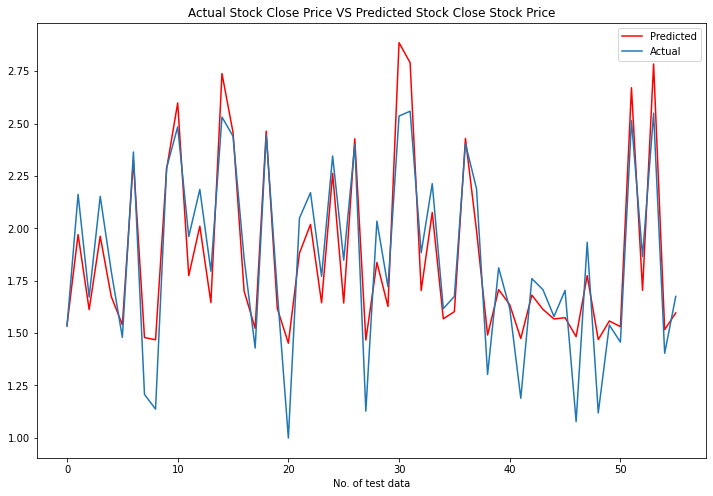

In [369]:
# Call plot graph function to see the  difference in actual vs predicted values

plot_graph(Y_pred_linear)
plt.show()

# Conclusion:-
 After implementing Linear Regression:
 * Mean Square Error is approximately 0.032 
 * Adjusted RSquare is approximately 0.8212
 * Mean Absolute Precentage Error is 0.0918 % 

#2.Lasso Regression

* The goal of **lasso regression** is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero.

In [370]:
# import the model in our dataset
from sklearn.linear_model import Lasso

In [371]:
# Make Instance (Object) 
lasso = Lasso(alpha=0.005,max_iter=3000)
lasso_model = lasso.fit(X_train,Y_train)

In [372]:
# Find Accuracy Score
lasso.score(X_train,Y_train)

0.8071410199365843

In [373]:
# Dependent Variable Lasso Regression Predicted Value
y_lasso_pred = lasso.predict(X_test)

In [374]:
# Dependent Variable Lasso Regression Predicted Value
y_lasso_pred

array([1.54636393, 1.98352945, 1.62988889, 1.96384081, 1.67100684,
       1.54001093, 2.32714662, 1.48547864, 1.47562366, 2.22517692,
       2.61351501, 1.79069246, 2.01376138, 1.65236679, 2.75271339,
       2.40942983, 1.70407912, 1.52621026, 2.40823323, 1.62324554,
       1.45912781, 1.8767091 , 2.01897514, 1.64419726, 2.25188493,
       1.61177123, 2.42894224, 1.47457413, 1.84117027, 1.63951372,
       2.86268731, 2.69978278, 1.69784653, 2.08177105, 1.57174581,
       1.60941476, 2.42519789, 1.98501296, 1.49310788, 1.71742164,
       1.63348652, 1.47329161, 1.65297416, 1.61654009, 1.56992928,
       1.58145717, 1.49287928, 1.77828061, 1.47647124, 1.56617487,
       1.53724584, 2.65702865, 1.70230241, 2.72978456, 1.51794948,
       1.59208543])

In [375]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['Lasso Predicted Closing Price'] = y_lasso_pred
lasso_df = test_df.loc[:,['Actual Closing Price','Lasso Predicted Closing Price']]
lasso_df.head(5)


,Actual Closing Price,Lasso Predicted Closing Price
Date,,
2008-04-01,1.532245,1.546364
2015-12-01,2.162056,1.983529
2019-12-01,1.671636,1.629889
2014-11-01,2.152533,1.963841
2010-08-01,1.793930,1.671007


In [376]:
# Inserting metrices for Lasso Regression
evaluation_metrices_df.loc[i,"Model_Name"]='Lasso regression'

# Calling evaluation matrix function for Lasso Regression
evaluation_metrics(y_lasso_pred)
i+=1  # i is a incremented variable

Mean Squared Error:  0.032133184074548335
Root Mean Squared Error:  0.1792573124716209
R2:  0.8334419586606889
Adjusted R2:  0.8238328408911133
Mean Absolute Percentage Error:  0.0922  %


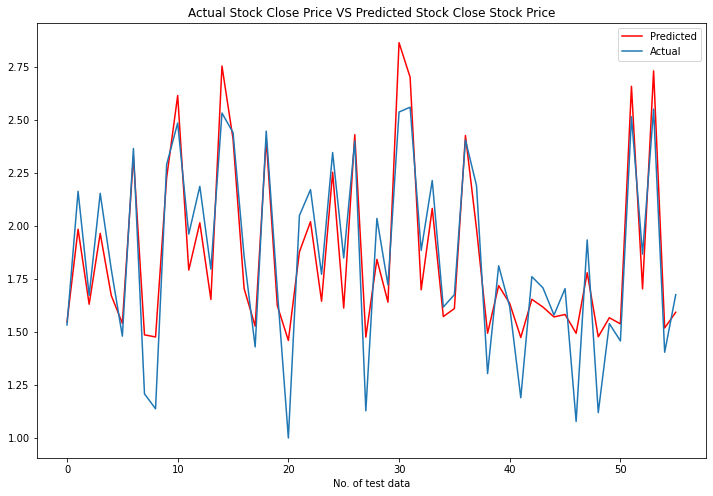

In [377]:
# Call plot graph function to see the  difference in actual vs predicted values

plot_graph(y_lasso_pred)

# Conclusion:-

* From the above Lasso Regression graph we can see that the No of Test Data is on the X-axis where as the predicted values is being mapped on Y-axis.

* In the Graph Predicted Value is indicated by Blue Color while the Actual Value is indicated by Orange color.

* When No of Test Data = 30 we can see that that the Predicted Value[More than 2.75] is much more higher than the Actual Value[Approx. 2.52]. And in some cases Actual Value is higher than Predicted Value.

* When No Of Test Data = Between 5 To 10 range[Approx. 8] , 17 , 20 , Between 25 to 30 range[Approx. 27] we can observe that the Predicted Value is less than the Actual Value.

* When No Of Test Data = 6 , 24, 26 there is less difference between the Actual Value and Predicted Value. 

#3.Cross Validation in Lasso Regression

* **Cross Validation :** In cross validation ,We divide our dataset into 3 parts training, validation and testing. The testing data is only for the final check, train and validation is used for the hyper parameter tuning in order to avoid the data leakage.

* **Hyperparameters :** are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. For eg, alpha, cv 


In [378]:
# Using Cross validation while implementing lasso regression

from sklearn.model_selection import GridSearchCV # Importing GridSearchCV for implementing cross validation
lasso = Lasso() # Creating lasso object

# estimating different alpha(hyper parameter) values and cross validation(cv) value is 5
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} 
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)   
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

* Total alpha values are 21 and cross validation i.e cv.It means our model will run 105 times [21*5=105].This is called GridSearchCV.

In [379]:
# Finding bext alpha value to fit the model

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03647994964082519


In [380]:
# Predicting the values of Y(dependent variable) on the basis of test data

Y_pred_lasso_cv = lasso_regressor.predict(X_test)

In [381]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['Lasso Predicted Cross Validation Price'] = Y_pred_lasso_cv
lasso_df_cv = test_df.loc[:,['Actual Closing Price','Lasso Predicted Cross Validation Price']]
lasso_df_cv.head(5)

,Actual Closing Price,Lasso Predicted Cross Validation Price
Date,,
2008-04-01,1.532245,1.550113
2015-12-01,2.162056,1.981170
2019-12-01,1.671636,1.632594
2014-11-01,2.152533,1.961702
2010-08-01,1.793930,1.673006


In [382]:
# Inserting metrices for Lasso Regression CV
evaluation_metrices_df.loc[i,"Model_Name"]='Lasso Regression CV'

#  Calling evaluation matrix function for Lasso Regression with Cross validation
evaluation_metrics(Y_pred_lasso_cv)
i+=1 # i is a incremented variable

Mean Squared Error:  0.03212396754825271
Root Mean Squared Error:  0.1792316030956949
R2:  0.8334897312861527
Adjusted R2:  0.8238833696295845
Mean Absolute Percentage Error:  0.0923  %


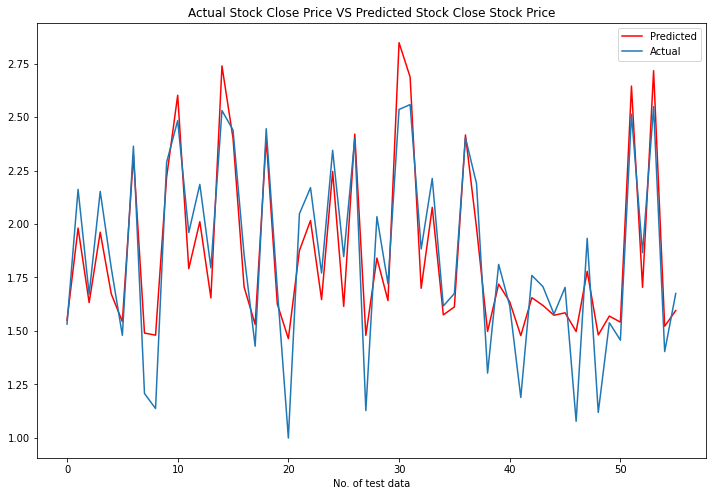

In [383]:
# Call plot graph function to see the  difference in actual vs predicted values

plot_graph(Y_pred_lasso_cv)

# Conclusion:-
 After implementing Lasso Regression with CV:
 * Mean Square Error is approximately 0.032 
 * Adjusted RSquare is approximately 0.823
 * Mean Absolute Precentage Error is 0.0923 % 

# 4. Ridge Regression

In [384]:
# Importing The Library
from sklearn.linear_model import Ridge

In [385]:
# Make Instance (Object)
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [386]:
# Find Accuracy Score
ridge.score(X_train, Y_train)

0.8089418042016019

In [387]:
# Dependent Variable Ridge Regression Predicted Value
y_ridge_pred = ridge.predict(X_test)

In [388]:
# Dependent Variable Ridge Regression Predicted Value
y_ridge_pred

array([1.53924126, 1.97258786, 1.61469405, 1.96253921, 1.67351826,
       1.53936998, 2.32562138, 1.47932102, 1.46871387, 2.27443522,
       2.60236667, 1.77664019, 2.01116619, 1.64652179, 2.74276364,
       2.45058466, 1.70126373, 1.5226852 , 2.45542208, 1.61796852,
       1.45223974, 1.88028553, 2.01900746, 1.6443647 , 2.26106847,
       1.63736604, 2.42824313, 1.46733944, 1.83799276, 1.62881547,
       2.88365728, 2.77651017, 1.70212949, 2.07731025, 1.56820017,
       1.60327924, 2.42922931, 1.98924332, 1.49046199, 1.70879767,
       1.63461986, 1.4734323 , 1.67581991, 1.61342564, 1.56736755,
       1.5742518 , 1.4840828 , 1.77451408, 1.46944252, 1.55879685,
       1.53127677, 2.67011711, 1.70359668, 2.77659269, 1.5159867 ,
       1.59509344])

In [389]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['Ridge Predicted Closing Price'] = y_ridge_pred
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(5)

,Actual Closing Price,Ridge Predicted Closing Price
Date,,
2008-04-01,1.532245,1.539241
2015-12-01,2.162056,1.972588
2019-12-01,1.671636,1.614694
2014-11-01,2.152533,1.962539
2010-08-01,1.793930,1.673518


In [390]:
# Inserting metrices for Ridge Regression 
evaluation_metrices_df.loc[i,"Model_Name"]='Ridge Regression'

#  Calling evaluation matrix function for Ridge Regression
evaluation_metrics(y_ridge_pred)
i+=1 # i is a incremented variable

Mean Squared Error:  0.03248208917656138
Root Mean Squared Error:  0.18022788124083738
R2:  0.8316334559530281
Adjusted R2:  0.8219200014887798
Mean Absolute Percentage Error:  0.0917  %


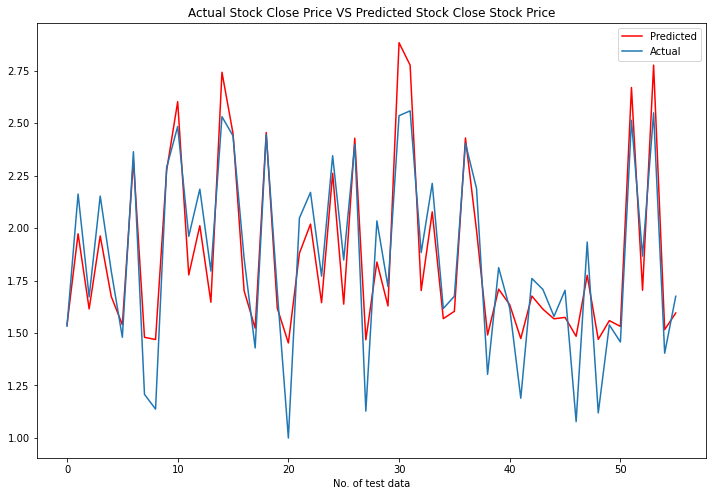

In [391]:
# Call plot graph function to see the  difference in actual vs predicted values

plot_graph(y_ridge_pred)

# Conclusion 
 * From the above Ridge Regression graph we can see that the No of Test Data is on the X-axis where as the predicted values are being mapped on Y-axis.
 
 * In the Graph Predicted Value is indicated by Blue Color while the Actual Value is indicated by Orange Color.

* When No of Test Data = 30 we can see that that the Predicted Value [More than 2.75 [Approx.2.90] ] is much more higher than the Actual Value[Approx. 2.52] And in some cases Actual Value is Higher than Predicted Value.

* When No Of Test Data = Between 5 To 10 range[Approx. 8] , 17 , 20 , Between 25 to 30 range[Approx. 27] we can observe that the Predicted Value is less than the Actual Value.

* When No Of Test Data = 6 , 19 , 24, 26 there is less difference between the Actual Value and Predicted Value.

# 5.Ridge Regression with Cross Validation

* **Ridge Regression** is a technique for analyzing multiple regression data that suffer from multicollinearity.It shrinks coefficients toward zero, but they rarely reach zero. 

In [392]:
# Implementing Ridge regression with CV

ridge = Ridge() # creating object

# estimating different alpha values and cross validation(cv) value is 3

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [393]:
# Finding bext alpha value to fit the model

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -0.0389969187602811


In [394]:
# Predicting the values of Y(dependent variable) on the basis of test data

Y_pred_ridge = ridge_regressor.predict(X_test)

In [395]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['Ridge Predicted Closing Price'] = Y_pred_ridge
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.tail(5)

,Actual Closing Price,Ridge Predicted Closing Price
Date,,
2017-04-01,2.513404,2.645532
2012-03-01,1.866051,1.699645
2018-01-01,2.549555,2.708131
2006-11-01,1.403464,1.517197
2009-10-01,1.674953,1.590675


In [396]:
# Inserting metrices for Ridge Regression CV
evaluation_metrices_df.loc[i,"Model_Name"]='Ridge Regression CV'

# Calling evaluation matrix function for Ridge Regression with Cross validation
evaluation_metrics(Y_pred_ridge)
i+=1 # i is a incremented variable

Mean Squared Error:  0.03200587161353412
Root Mean Squared Error:  0.17890184910596682
R2:  0.834101865693102
Adjusted R2:  0.8245308194830886
Mean Absolute Percentage Error:  0.0922  %


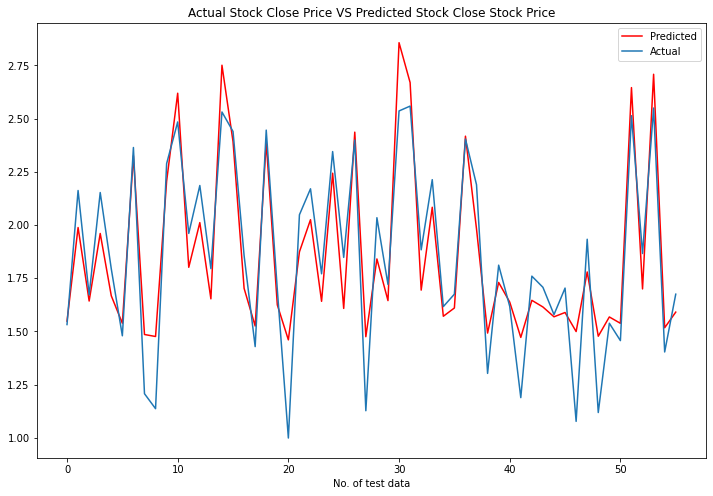

In [397]:
# Call plot graph function to see the  difference in actual vs predicted values

plot_graph(Y_pred_ridge)

# Conclusion:-
 After implementing Ridge Regression with CV:
 * Mean Square Error is approximately 0.0317 
 * Adjusted RSquare is approximately 0.814
 * Mean Absolute Precentage Error is 0.092 % 

# 6.Elastic Net using Cross Validation

* **ElasticNet regression**  is a combination of Lasso regression and Ridge regression.

In [398]:
# Implement Elastic Net with CV
# Elastic Net is a combination of Lasso and Ridge regression 

elastic = ElasticNet()  # Creating object 

# estimating different alpha values and cross validation(cv) value is 5
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [399]:
# Finding bext alpha  and l1 ratio value to fit the model

print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.6}

Using  {'alpha': 0.01, 'l1_ratio': 0.6}  the negative mean squared error is:  -0.03641540663708944


In [400]:
# Predicting the values of Y(dependent variable) on the basis of test data

Y_pred_elastic = elastic_regressor.predict(X_test)

In [401]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['Elastic Net Predicted Closing Price'] = Y_pred_elastic
relastic_cv_df = test_df.loc[:,['Actual Closing Price','Elastic Net Predicted Closing Price']]
relastic_cv_df.head(5)

,Actual Closing Price,Elastic Net Predicted Closing Price
Date,,
2008-04-01,1.532245,1.547587
2015-12-01,2.162056,1.982409
2019-12-01,1.671636,1.631532
2014-11-01,2.152533,1.962446
2010-08-01,1.793930,1.671508


In [402]:
# Inserting metrices for Elastiv Net CV
evaluation_metrices_df.loc[i,"Model_Name"]='Elastiv Net CV'

# Calling evaluation matrix function for Elastic Net with Cross validation
evaluation_metrics(Y_pred_elastic)
i+=1 # i is a incremented variable

Mean Squared Error:  0.03209876094409088
Root Mean Squared Error:  0.1791612707704734
R2:  0.833620386331363
Adjusted R2:  0.8240215624658648
Mean Absolute Percentage Error:  0.0922  %


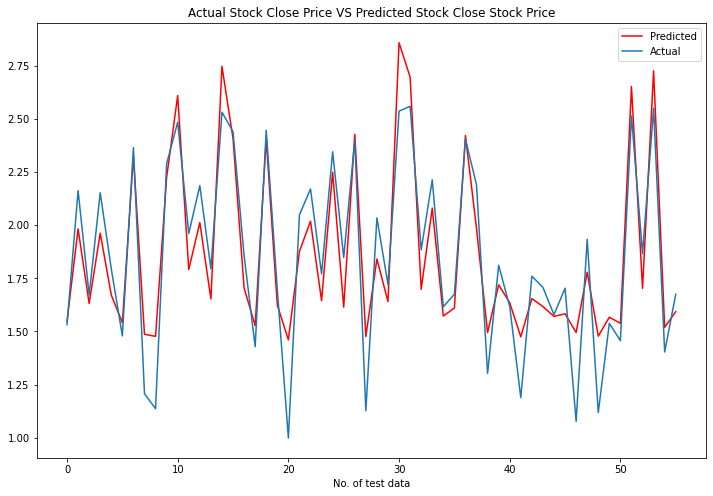

In [403]:
# Call plot graph function to see the  difference in actual vs predicted values

plot_graph(Y_pred_elastic)


# Conclusion:-
 After implementing Elastic Net with CV:
 * Mean Square Error is approximately 0.032
 * Adjusted RSquare is approximately 0.824
 * Mean Absolute Precentage Error is 0.0922 % 

#7.KNeighbour Regressor

* **KNN regression** is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood.

In [404]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, Y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test) 

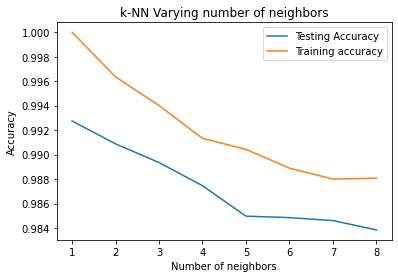

In [405]:
# Generate plot

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

**The above graph showing the number of neighbour varying according to the training and test data.**

In [406]:
# Setup a knn classifier with k neighbors
knn = KNeighborsRegressor(n_neighbors=5)

In [407]:
# Fit the model
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [408]:
knn.score(X_test,Y_test)

0.9849667212324535

In [409]:
# Let us get the predictions using the regressor we had fit above
Y_pred_knn = knn.predict(X_test)

In [410]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['KNN Predicted Closing Price'] = Y_pred_knn
KNN_df = test_df.loc[:,['Actual Closing Price','KNN Predicted Closing Price']]
KNN_df.head(5)

,Actual Closing Price,KNN Predicted Closing Price
Date,,
2008-04-01,1.532245,1.533379
2015-12-01,2.162056,2.179279
2019-12-01,1.671636,1.728682
2014-11-01,2.152533,2.179279
2010-08-01,1.793930,1.801372


In [411]:
# Inserting metrices for KNeighbour Regressor
evaluation_metrices_df.loc[i,"Model_Name"]='KNeighbour Regressor'

# Calling evaluation matrix function for KNeighbour Regressor
evaluation_metrics(Y_pred_knn)
i+=1  # i is a incremented variable

Mean Squared Error:  0.002900292954919346
Root Mean Squared Error:  0.0538543680207961
R2:  0.9849667212324535
Adjusted R2:  0.984099416688172
Mean Absolute Percentage Error:  0.0213  %


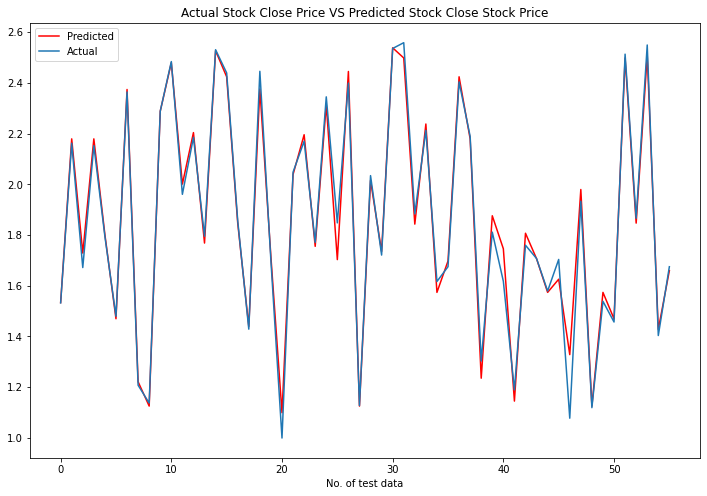

In [412]:
# Call plot graph function to see the  difference in actual vs predicted values

plot_graph(Y_pred_knn)


# Conclusion:-
 After implementing KNeighbour Regressor:
 * Mean Square Error is approximately 0.002
 * Adjusted RSquare is approximately 0.984
 * Mean Absolute Precentage Error is 0.0213 % 

# 8. SVR(Support Vector Regressor)

In [413]:
# importing SVR model

from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')  #  Kernel is a function used to map a lower dimensional data into a higher dimensional data
# Fitting the model
svm_model=svm_regressor.fit(X_train,Y_train)
# prediction
y_svm_pred=svm_model.predict(X_test)
y_svm_pred

array([1.58036224, 2.00366249, 1.65743313, 1.99283247, 1.71207414,
       1.58097114, 2.34851108, 1.52109811, 1.51071734, 2.30837405,
       2.61931621, 1.81465239, 2.04044911, 1.68492693, 2.75227511,
       2.47835059, 1.73819506, 1.56397926, 2.48459292, 1.65773352,
       1.49503821, 1.91493136, 2.05437139, 1.68318606, 2.2857006 ,
       1.68618151, 2.4545585 , 1.50927023, 1.87219893, 1.66843534,
       2.90007596, 2.8033921 , 1.74066384, 2.10675871, 1.60862035,
       1.64256673, 2.44822265, 2.02109369, 1.53288265, 1.75189727,
       1.67844211, 1.51705259, 1.72068543, 1.65224825, 1.60779728,
       1.61789862, 1.52860029, 1.81103945, 1.51165673, 1.59929578,
       1.57243163, 2.68502   , 1.7415546 , 2.79666451, 1.55813804,
       1.63704211])

In [414]:
# Adding one column in test dataframe to see the difference between actual and predicted values

test_df['SVR Predicted Closing Price'] = y_svm_pred
SVR_df = test_df.loc[:,['Actual Closing Price','SVR Predicted Closing Price']]
SVR_df.head(5)

,Actual Closing Price,SVR Predicted Closing Price
Date,,
2008-04-01,1.532245,1.580362
2015-12-01,2.162056,2.003662
2019-12-01,1.671636,1.657433
2014-11-01,2.152533,1.992832
2010-08-01,1.793930,1.712074


In [415]:
# Inserting metrices for Support Vector Regressor 
evaluation_metrices_df.loc[i,"Model_Name"]='Support Vector Regressor'

# Calling evaluation matrix function for Support Vector Regressor
evaluation_metrics(y_svm_pred)
i+=1  # i is a incremented variable

Mean Squared Error:  0.03423183266242545
Root Mean Squared Error:  0.18501846573362737
R2:  0.8225638957384034
Adjusted R2:  0.812327197415619
Mean Absolute Percentage Error:  0.0921  %


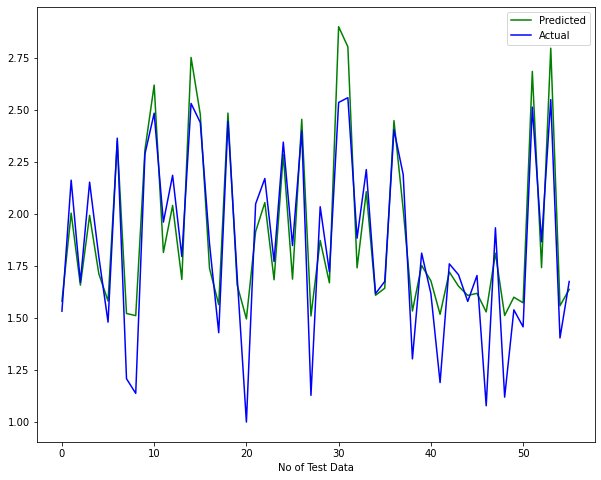

In [416]:
#SVM Visualization

plt.figure(figsize=(10,8))
plt.plot(y_svm_pred,color='green')
plt.plot(np.array(Y_test),color='blue')
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# Conclusion
* Actual values are shown by blue line and predicted values are shown by green color line in a graph above.
* SVR have less value of adjusted R^2 as compared to all other algorithms.
* It have mean error square of around 0.034.


# Creating table of Evaluation Metrices for each model 

In [417]:
# print all records
evaluation_metrices_df    

,Model_Name,MSE,RMSE,R2,Adjusted R2,MAPE
0,Linear regression,0.0326,0.1806,0.8310,0.8213,0.0918
1,Lasso regression,0.0321,0.1793,0.8334,0.8238,0.0922
2,Lasso Regression CV,0.0321,0.1792,0.8335,0.8239,0.0923
3,Ridge Regression,0.0325,0.1802,0.8316,0.8219,0.0917
4,Ridge Regression CV,0.0320,0.1789,0.8341,0.8245,0.0922
5,Elastiv Net CV,0.0321,0.1792,0.8336,0.8240,0.0922
7,KNeighbour Regressor,0.0029,0.0539,0.9850,0.9841,0.0213
8,Support Vector Regressor,0.0342,0.1850,0.8226,0.8123,0.0921


# Over all graphical representation between Actual Closing Price and Predicted Closing Price by All Algorithms

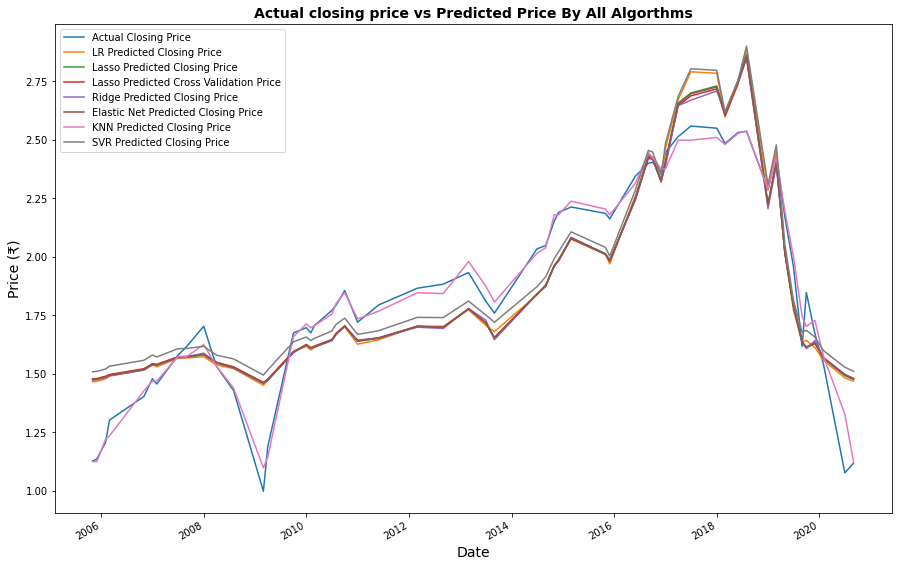

In [418]:
# Graph between Actual Close price and Predicted Price by All Algorithms

test_df.plot(figsize = (15,10))
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Predicted Price By All Algorthms',fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

# Final Conclusion
* Target Variable is strongly dependent on Independent Variables. 

* We have seen that there is neither null nor duplicate values.But Date feature have values of object data type. So, We converted it into proper date format YYYY-MM-DD.

* KNeighbour Regressor and KNeighbour Regressor CV performing better than other models with adjusted R^2 0.9841  and 0.9916 respectively.

*  With the help of visualization ,We have seen that from 2018 onwards there is sudden fall in the stock closing price. It makes sense how severly Rana Kapoor case fraud affected the price of Yes bank stocks.

*  With the help of distribution plot ,We see that our data is positively skewed.So,We apply some kind of transformation i.e. Log Transformation to convert it into a normal distribution.

* Lasso and Ridge regression models are giving the same result approximately.
* I have implementsd Cross Validation on different algorithm as CV performs better on small datasets.But, the result is nearly same. 

*  In all the models except KNeigbour Regressor, the accuracy lie within the range of 81 to 83% and there is no such improvement in accuracy score even after hyperparameter tuning.

* Support Vector Regressor algorithm performs worst then other algorithm with accuracy of 81.2 % .

* KNR cross validation perform best with very less mean square error i.e. 0.015